In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torchvision # 이미지와 관련된 파이토치 라이브러리
import torchvision.transforms as tr # 이미지 전처리 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에서 사용할 수 있도록 지원해 주는 라이브러리

#### 3.3 데이터 분활

In [17]:
x_arr = np.arange(1000).reshape(100, 10)    # 학습/평가 데이터
t_arr = np.arange(100)                      # 라벨 데이터

# 데이터 분활 
# ===== 반환 값 =====
# 첫번째(학습 입력 데이터)
# 두번째(테스트 입력 데이터)
# 세번째(학습 라벨 데이터)
# 네번째(테스트 라벨 데이터)

x_train, x_test, t_train, t_test = train_test_split(x_arr, t_arr, test_size=0.4, random_state=0) 
x_test, x_val, t_test, t_val = train_test_split(x_test, t_test, test_size=0.5, random_state=0)


In [20]:
t_val.shape

(20,)

#### 4.1 Tensor

In [23]:
x = torch.empty(5,4) # 빈 텐서 생성
print(x)
x = torch.ones(3,3) # np.ones() 와 비슷
print(x)
x = torch.zeros(2) # np.zeros() 와 비슷
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([0., 0.])


##### 4.1.2 리스트 넘파일 배열 -> 텐서

In [25]:
list = [1,2,3,4]
print(torch.Tensor(list))
np_arr = np.arange(10)
print(torch.Tensor(np_arr))

tensor([1., 2., 3., 4.])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


##### 4.1.3 텐서의 크기, 타입, 연산

In [26]:
x = torch.zeros(10, 5)
print(x.size())

torch.Size([10, 5])


##### 4.1.4 텐서의 크기 변환

In [28]:
x = torch.rand(8, 8)
print(x.size())
a = x.view(64) # 크기변경 (8,8) -> (64,)
print(a.size())
b = x.view(-1, 4, 4) # -1 값은 다른 차원의 값에 의해 결정됨
print(b.size())

torch.Size([8, 8])
torch.Size([64])
torch.Size([4, 4, 4])


##### 4.1.5 텐서에서 넘파이 배열로 변환

In [3]:
x = torch.rand(8, 8)
y = x.numpy()
print(y)

[[0.7954559  0.4034763  0.95985603 0.16217017 0.07403088 0.94495827
  0.85320455 0.38078135]
 [0.11530358 0.3448822  0.60404027 0.93677473 0.3637079  0.4980423
  0.95931756 0.34458733]
 [0.10379654 0.41405356 0.00622237 0.03431869 0.2654541  0.16317368
  0.54455805 0.5970246 ]
 [0.00400651 0.19103533 0.5982291  0.11856294 0.7557721  0.18596333
  0.84181774 0.87041837]
 [0.8472718  0.8984901  0.98554665 0.743129   0.5150888  0.07820296
  0.29760975 0.37037462]
 [0.9601472  0.9957661  0.11923552 0.6115082  0.6900076  0.11022103
  0.5320607  0.2852618 ]
 [0.47037846 0.47458714 0.26585042 0.891116   0.6815772  0.03174239
  0.94159794 0.7300414 ]
 [0.72907573 0.9410358  0.30948502 0.19007361 0.518853   0.52390015
  0.45197845 0.16641426]]


##### 4.1.6 단일 텐서에서 값으로 반환하기

In [9]:
x = torch.ones(1)
print(x.item())

1.0


#### 4.2 역전파
##### 4.2.1 그래디언트 텐서

In [17]:
x = torch.ones(2,2, requires_grad=True)
print("x: ")
print(x)
y = x+1
print("y=x+1: ")
print(y)
z = 2*y**2
print("z=2*y**2: ")
print(z)
r = z.mean()
print("r = z.mean(): ")
print(r)
r.backward()
print("x gradient: ")
print(x.grad)


x: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
y=x+1: 
tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
z=2*y**2: 
tensor([[8., 8.],
        [8., 8.]], grad_fn=<MulBackward0>)
r = z.mean(): 
tensor(8., grad_fn=<MeanBackward0>)
x gradient: 
tensor([[2., 2.],
        [2., 2.]])


##### 4.2.2 자동 미분 - 선형회귀식

입력값 x
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])
==== unsqueeze(0) ====
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
         14., 15., 16., 17., 18., 19.]])
==== unsqueeze(1) ====
tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.]])
==== y_hat ====
tensor([[-0.7063],
        [ 1.3928],
        [ 3.4919],
        [ 5.5910],
        [ 7.6901],
        [ 9.7892],
        [11.8883],
        [13.9874],
        [16.0865],
        [18.1856],
        [20.2847],
        [22.3838],
        [24.4829],
        [26.5820],
        [28.6811],
        [30.7802],
        [32.8793],
        [34.9784],
        [37.0775],
        [39.1766]], grad_fn=<AddB

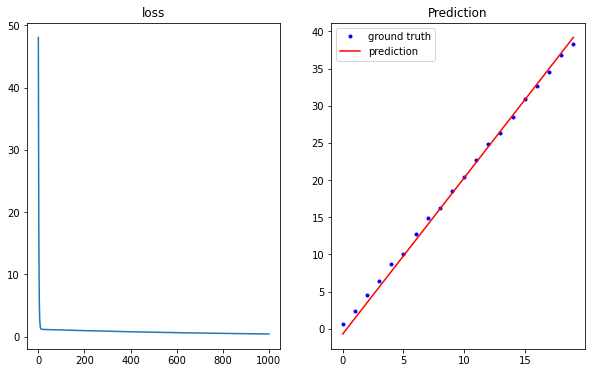

In [21]:
x_size = 20
x = torch.FloatTensor(range(x_size))
print("입력값 x")
print(x)
# unsqueeze(n): n번째 위치의 차원을 늘려준다.
print("==== unsqueeze(0) ====")
x1 = x.unsqueeze(0) 
print(x1)
print("==== unsqueeze(1) ====")
x2 = x.unsqueeze(1)
print(x2)
# x3 = x.unsqueeze(2) # => 오류발생 1차원 배열에서 는 axis 0, 1 만 가능, 2차원은 0, 1, 2 

x = x.unsqueeze(1)
y = 2*x + torch.rand(x_size,1) # <= 정답 역활
num_features = x.shape[1] 
w = torch.randn(num_features, 1, requires_grad=True) # x텐서와 내적연산을 해야함으로 x의 열개수(num_feature)와 일치하는 가중치 텐서를 만듬
b = torch.randn(1, requires_grad=True)

learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr=learning_rate) # 최적화 연산자 옵티마이저 (확률적 경사하강법)

loss_stack=[]
for epoch in range(1001):
    # Pytorch는 기본설정에 옵티마이저의 gradients값들을 추후 역전파 시 가산시키도록 되어 있음,
    # 이러한 미분값 가산방식은 RNN을 학습시킬 때 편리함, 그러나 기본적인 방식의 학습일 경우
    # 학습이 한번 종료되면 반드시 옵티마이저의 이전 미분값을 zero_grad()로 초기화 하여 학습을 진행햐야 함
    optimizer.zero_grad() # 최적화는 계산을 누적시키기 때문에 매 epoch 마다 zero_grad()를 통해 값을 초기화 해준다.

    y_hat = torch.matmul(x, w)+b # 예측값 
    loss = torch.mean((y_hat - y)**2) # 손실값 (최소제곱법)
    loss.backward() # 역전파로 미분구함
    optimizer.step() # 미분값 업데이트
    loss_stack.append(loss.item()) # 손실값 저장

print("==== y_hat ====")
print(y_hat)

print("==== y ====")
print(y)

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("loss")
plt.subplot(122)
plt.plot(x, y, '.b') # .: 포인트 마커, b: blue
plt.plot(x, y_hat.detach().numpy(), '-r') # r: read, -: solid line
# tensor.detach().numpy() => grad 정보가 저장된 텐서의 경우 tolist()는 바로 적용 가능하지만, 
# 넘파이 배열로 변경하기 위해서는 detach() 메소드로 grad정보 제거후 numpy()를 호출할 수 있음!
plt.legend(['ground truth', 'prediction'])
plt.title('Prediction')
plt.show()




#### 4.3 데이터 불러오기

##### 4.3.1 파이토치 제공 데이터 사용

In [30]:
transf = tr.Compose([tr.Resize(16), tr.ToTensor()]) # tr.Compose() 내에 원하는 전처리 과정을 차례로 입력, 
                                                  # 1) tr.Resize(16): 사이즈를 16x16으로 변환
                                                  # 2) tr.ToTensor(): 데이터를 텐서로 변환
# 데이터 셋
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf) 
# torchvision.datasets에서 제공하는 CIFAR10 데이터로드, train=True: 훈련데이터, train=False: 테스트 데이터
# transform = trainsf: 전처리과정 설정
testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transf)


Files already downloaded and verified
torch.Size([3, 16, 16])


In [53]:

print(f"훈련데이터 개수:  {len(trainset)}")
print("trainset[0]: 첫번째 훈련데이터")
print("trainset[0][0]: 첫번째 훈련데이터의 이미지 데이터")
print("첫번째 훈련데이터의 이미지 데이터 형상: ")
print(trainset[0][0].size())
print("trainset[0][1]: 첫번째 훈련데이터의 라벨")
print("Image: trainset[0][0][0][:5]: ") 
print(trainset[0][0][0][:5])
print("label: trainset[0][1]: ")
print(trainset[0][1])

훈련데이터 개수:  50000
trainset[0]: 첫번째 훈련데이터
trainset[0][0]: 첫번째 훈련데이터의 이미지 데이터
첫번째 훈련데이터의 이미지 데이터 형상: 
torch.Size([3, 16, 16])
trainset[0][1]: 첫번째 훈련데이터의 라벨
Image: trainset[0][0][0][:5]: 
tensor([[0.1137, 0.2039, 0.4118, 0.5176, 0.5098, 0.4588, 0.4824, 0.4863, 0.4824,
         0.4863, 0.5098, 0.5176, 0.5490, 0.5725, 0.5490, 0.5216],
        [0.1333, 0.3020, 0.4510, 0.4627, 0.4510, 0.4431, 0.4667, 0.4902, 0.4667,
         0.4745, 0.5137, 0.5176, 0.5020, 0.5176, 0.4824, 0.4275],
        [0.2824, 0.4392, 0.4980, 0.4667, 0.4627, 0.4588, 0.4353, 0.4196, 0.4000,
         0.4000, 0.4431, 0.4824, 0.5216, 0.4667, 0.3647, 0.2549],
        [0.4392, 0.5020, 0.5137, 0.5020, 0.5059, 0.4549, 0.3137, 0.3059, 0.5294,
         0.3647, 0.3176, 0.4431, 0.5333, 0.4824, 0.3961, 0.3647],
        [0.5569, 0.5412, 0.4980, 0.5059, 0.5020, 0.3725, 0.2588, 0.3608, 0.6392,
         0.5059, 0.3765, 0.3608, 0.4667, 0.5216, 0.4941, 0.5020]])
label: trainset[0][1]: 
6


In [54]:
# DataLoader는 데이터셋을 받아 데이터를 미니배치 형태로 만들어줌
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
testloader = DataLoader(testset, batch_size=50, shuffle=False)
# DataLoader의 길이는 데이터 셋 / 배치사이즈 => 50,000 / 50 = 1,000
print(len(trainloader))

1000


In [56]:
# iter, next를 활용하여 데이터 로더의 첫번째 배치 데이터 형상확인
images, labels = iter(trainloader).next()
print(images.size())

torch.Size([50, 3, 16, 16])


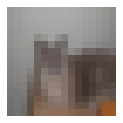

In [63]:
# 그림을 그려주기 위해서는 채널차원이 마지막에 위치하는 형사으로 변경되어야 함
# 기존(3, 16, 16) -> (16, 16, 3) 
# 차원을 변경해주는 함수: permute()
onehot = images[0].permute(1,2,0).numpy() 
plt.figure(figsize=(2,2))
plt.imshow(onehot)
plt.axis("off") # 눈금 숫자 제거
plt.show()

##### 4.3.2 같은 클래스 별로 폴더를 정리한 경우

In [26]:

transf = tr.Compose([tr.Resize(128),tr.ToTensor()]) # 128x128 이미지 크기 변환 후 텐서로 만든다.
trainset = torchvision.datasets.ImageFolder(root='./class', transform=transf) # 커스텀 데이터 불러온다.
trainloader = DataLoader(trainset, batch_size=1, shuffle=False) # 데이터를 미니 배치 형태로 만들어 준다.

torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])
tensor(0)
(128, 128, 3)


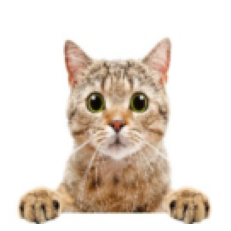

In [54]:
image, label = iter(trainloader).next()
print(image.size())
print(image.shape)
print(label[0])
img = image[0].permute(1,2,0).numpy()
print(img.shape)
plt.imshow(img)
plt.axis("off")
plt.show()

##### 4.3.3 정리되지 않은 커스템 데이터 불러오기

In [3]:
train_images = np.random.randint(0, 255, size=(100, 32, 32, 3))/255.0 # (100(이미지 수), 32(너비), 32(높이), 3(채널 수))
train_labels = np.random.randint(10, size=(100,1))

100
torch.Size([5, 32, 32, 3])
(5, 32, 32, 3)


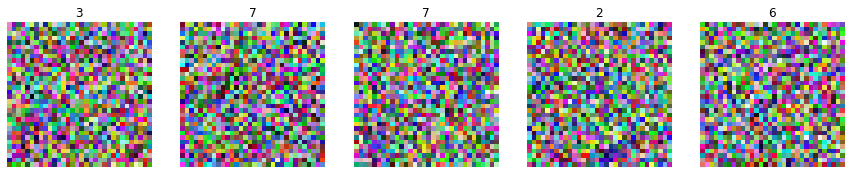

In [6]:
class TensorData(Dataset):
    def __init__(self, train_data, label_data):
        self.train_data = torch.FloatTensor(train_data)
        # 파이토치에서는 이미지 데이터의 표현이 (채널 수, 너비, 높이) 순으로 표현됨
        self.train_data = self.train_data.permute(0, 3, 1, 2) # (100(이미지 수), 32(너비), 32(높이), 3(채널 수)) -> # (100(이미지 수), 3(채널 수), 32(너비), 32(높이))
        self.label_data = torch.LongTensor(label_data)
        self.len = self.label_data.shape[0]
    def __getitem__(self, index):
        return self.train_data[index], self.label_data[index]
    def __len__(self):
        return self.len

trainset = TensorData(train_images, train_labels)
print(len(trainset))
dataloader = DataLoader(trainset, batch_size=5, shuffle=False)

batch_image, batch_label,  = iter(dataloader).next()
print(batch_image.shape)
imgs_data = batch_image.permute(0, 2, 3, 1).numpy() # 이미지 전시를 위해 차원순서 변경 (100(이미지 수), 3(채널 수), 32(너비), 32(높이)) -> (100(이미지 수), 32(너비), 32(높이), 3(채널 수))
print(imgs_data.shape)

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(151+i)
    #print(imgs_data[i].shape)
    plt.imshow(imgs_data[i])
    plt.title(batch_label[i].item())    
    plt.axis("off")
plt.show()



##### 4.3.4 커스텀 테이터와 커스텀 전처리 사용하기

In [80]:
class ToTensor:
    def __call__(self, sample):        
        #print(sample)
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2, 0, 1) # 데이터를 파이토치의 이미지 데이터 표현 형식으로 변경(채널 수, 너비, 높이)
        lables = torch.LongTensor(labels)
        return inputs, labels

In [84]:
class CutOut:
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)
    def __call__(self, sample):
        #print(sample)
        inputs, labels = sample
        active = np.random.randint(0, self.ratio, 1)
        if active == 0:
            _, w, h = inputs.size() # 채널, 너비, 높이
            min_len = min(w, h) # 너비와 높이 중 짧은 것 선택
            box_size = int(min_len//4) # // => 몫, cutout 사각형의 길이
            idx = int(np.random.randint(0, min_len-box_size, 1)) # cutout 사각형의 시작 위치
            inputs[:, idx:idx+box_size, idx:idx+box_size] = 0 # cutout 사각형은 이미지 데이터의 내부 대각선을 따라 위치하게 된다.
        return inputs, labels

In [54]:
class MyDataset(Dataset):
    def __init__(self, inputData, labelData, transform=None):
        self.inputData = inputData
        self.labelData = labelData
        self.transform = transform
        self.len = len(labelData)
        self.tensor = ToTensor()
    def __getitem__(self, index):
        sample = self.inputData[index], self.labelData[index]
        if self.transform:
            sample = self.transform(sample)
        else:
            sample = self.tensor(sample)        
        return sample
    def __len__(self):
        return self.len
    

(array([[[0.90980392, 0.52156863, 0.8       ],
        [0.56078431, 0.03137255, 0.66666667],
        [0.12941176, 0.40392157, 0.41176471],
        ...,
        [0.65882353, 0.3254902 , 0.87058824],
        [0.24705882, 0.41176471, 0.16470588],
        [0.73333333, 0.27058824, 0.02352941]],

       [[0.90196078, 0.49803922, 0.6627451 ],
        [0.16470588, 0.32156863, 0.81176471],
        [0.47843137, 0.6       , 0.11372549],
        ...,
        [0.48235294, 0.58039216, 0.9254902 ],
        [0.67843137, 0.61960784, 0.09019608],
        [0.79607843, 0.87058824, 0.29019608]],

       [[0.52941176, 0.8       , 0.56470588],
        [0.85098039, 0.95294118, 0.63529412],
        [0.75294118, 0.67843137, 0.67058824],
        ...,
        [0.43921569, 0.35294118, 0.90196078],
        [0.0627451 , 0.01568627, 0.35294118],
        [0.08627451, 0.6       , 0.56862745]],

       ...,

       [[0.6745098 , 0.81568627, 0.88627451],
        [0.60784314, 0.00784314, 0.74509804],
        [0.56078431, 

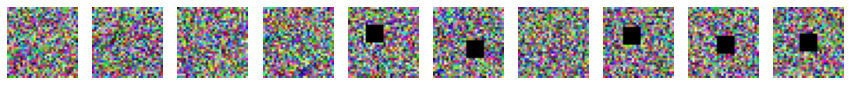

In [85]:
trans = tr.Compose([ToTensor(), CutOut()])

myTrainset = MyDataset(train_images, train_labels, transform=trans)
dataloader = DataLoader(myTrainset, batch_size=10, shuffle=False)

batch_data, batch_label = iter(dataloader).next() # 데이터로더는 (데이터, 라벨) 구조로 구성

print(batch_data.size())

plt.figure(figsize=(15, 5))
for i, data in enumerate(batch_data):    
    #print(data.size())
    plt.subplot(1,10,1+i)    
    plt.imshow(data.permute(1,2,0).numpy())
    plt.axis("off")
plt.show()


##### 4.3.5 커스텀 데이터와 파이토치 제공 전처리 사용하기

In [87]:
class MyTransform:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2, 0, 1)
        labels = torch.FloatTensor(labels)
        trans = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()]) 
        final_outputs = trans(inputs) # => 파이토치 제공 전처리기는 데이터만 매개로 받는다.
        return final_outputs, labels
        


torch.Size([10, 3, 128, 128])


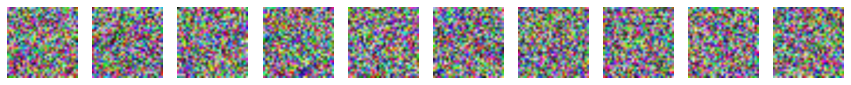

In [88]:
myTrainset = MyDataset(train_images, train_labels, transform=MyTransform())
dataloader = DataLoader(myTrainset, batch_size=10, shuffle=False)

batch_data, batch_label = iter(dataloader).next() # 데이터로더는 (데이터, 라벨) 구조로 구성

print(batch_data.size())

plt.figure(figsize=(15, 5))
for i, data in enumerate(batch_data):    
    #print(data.size())
    plt.subplot(1,10,1+i)    
    plt.imshow(data.permute(1,2,0).numpy())
    plt.axis("off")
plt.show()


##### 4.3.6 커스텀 전처리기와 파이토치에서 제공하는 전처리 함께 사용하기

In [90]:
class CutOut_compability:
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)
    def __call__(self, inputs):
        #print(sample)        
        active = np.random.randint(0, self.ratio, 1)
        if active == 0:
            _, w, h = inputs.size() # 채널, 너비, 높이
            min_len = min(w, h) # 너비와 높이 중 짧은 것 선택
            box_size = int(min_len//4) # // => 몫, cutout 사각형의 길이
            idx = int(np.random.randint(0, min_len-box_size, 1)) # cutout 사각형의 시작 위치
            inputs[:, idx:idx+box_size, idx:idx+box_size] = 0 # cutout 사각형은 이미지 데이터의 내부 대각선을 따라 위치하게 된다.
        return inputs

class MyTransform2:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2, 0, 1)
        labels = torch.FloatTensor(labels)
        trans = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor(), CutOut_compability()]) 
        final_outputs = trans(inputs) # => 파이토치 제공 전처리기는 데이터만 매개로 받는다.
        return final_outputs, labels

torch.Size([10, 3, 128, 128])


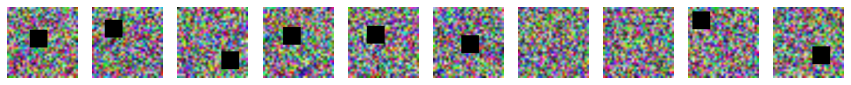

In [91]:
myTrainset = MyDataset(train_images, train_labels, transform=MyTransform2())
dataloader = DataLoader(myTrainset, batch_size=10, shuffle=False)

batch_data, batch_label = iter(dataloader).next() # 데이터로더는 (데이터, 라벨) 구조로 구성

print(batch_data.size())

plt.figure(figsize=(15, 5))
for i, data in enumerate(batch_data):    
    #print(data.size())
    plt.subplot(1,10,1+i)    
    plt.imshow(data.permute(1,2,0).numpy())
    plt.axis("off")
plt.show()